# Check Critical inertia $m_c$ 

In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [51]:
N_set = 50
m_set = np.linspace(3.0,6.0,N_set,endpoint=True).reshape(-1,1)


In [121]:
0.1*50

5.0

In [128]:
np.linspace(2,7,N_set,endpoint=False)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9])

In [141]:
r_std_sets = {}

In [148]:
r_std_sets.keys()

dict_keys([12, 10])

In [149]:
from knockknock import desktop_sender


@desktop_sender(title="Knockknock Desktop Notifier")
def ALRAM(): pass

In [165]:
from tqdm.notebook import tqdm_notebook as tqdm

In [192]:
# m = 2
K = 5
for N in [100,250]:
    r_std_sets = {}
    r_mean_sets = {}
    for seed in tqdm(np.arange(50)):
        theta_init, omega, Kc = Q_Normal(N, 0, 1, seed=seed)
        N_set = 31
        m_set = np.linspace(3,6,N_set,endpoint=True).reshape(-1,1)
        omega = np.sort(omega) - np.mean(omega)
        theta_sets = (np.ones((N_set, 1))*theta_init)
        omega_sets = (np.ones((N_set, 1))*(omega))

        t_end = 5000
        dt = 0.1
        t = np.arange(0, t_end, dt)
        theta_set, dtheta_set, rs = mf2_sets_TLO(m_set=m_set, N=N, K=K, t_array=t, p_theta=theta_sets,
                                                p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))
        del theta_set, dtheta_set

        rs_ = rs.T[0].T
        sum_time = 2000
        r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                        for i in range(len(t)-sum_time)])
        r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                        for i in range(len(t)-sum_time)])

        r_std_sets[seed] = r_std[-1,:]
        r_mean_sets[seed] = r_mean[-1,:]
        # ALRAM()
    np.save(f'231024 secondary cluster/N={N},K={K} r_std',r_std_sets)
    np.save(f'231024 secondary cluster/N={N},K={K} r_mean',r_mean_sets)
 

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

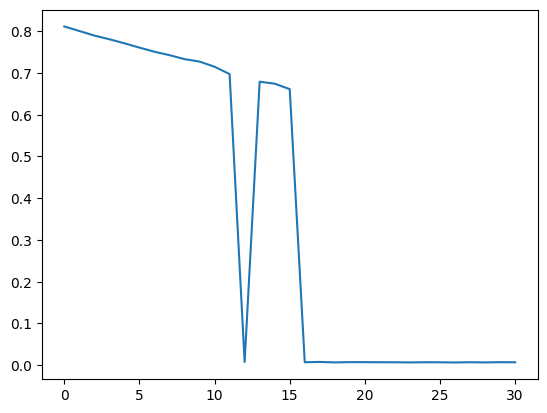

In [190]:
plt.plot(r_mean[-1,:])
plt.plot(r_mean[-1,:])

In [161]:
rs_ = rs.T[0].T
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set, axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

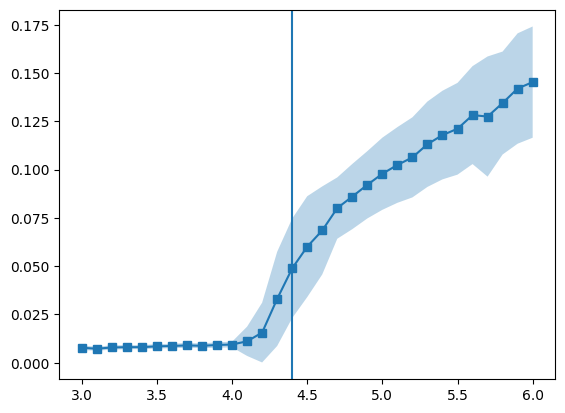

In [182]:
r_std_means = np.mean([*r_std_sets.values()],axis=0)
r_std_stds = np.std([*r_std_sets.values()],axis=0)
plt.plot(m_set.reshape(-1),r_std_means,'s-')
plt.fill_between(m_set.reshape(-1),r_std_means-r_std_stds,r_std_means+r_std_stds,alpha=0.3)
plt.axvline(4.4)

In [183]:
np.save(f'N={N},K={K} r_std',r_std_sets)

In [187]:
np.load('N=1000,K=5 r_std.npy',allow_pickle=True)

array({12: array([0.0083875 , 0.00740564, 0.00774978, 0.00771925, 0.00750141,
       0.00819426, 0.00848826, 0.00776301, 0.00808432, 0.00837875,
       0.0118043 , 0.00847527, 0.00854253, 0.05308283, 0.06312474,
       0.07702552, 0.07984078, 0.08777621, 0.09346284, 0.08953743,
       0.10340485, 0.1128041 , 0.11189649, 0.11530637, 0.12013588,
       0.12754822, 0.13902683, 0.11862827, 0.13115243, 0.14813733,
       0.12101658]), 10: array([0.00955258, 0.00602723, 0.00883291, 0.00780306, 0.00884601,
       0.00855971, 0.00849409, 0.00940876, 0.0098181 , 0.00703707,
       0.00946723, 0.00881373, 0.00834908, 0.01974886, 0.07178017,
       0.0114973 , 0.07823845, 0.08657671, 0.09301072, 0.09652615,
       0.09769869, 0.11852039, 0.11613811, 0.11931287, 0.11307219,
       0.13208628, 0.13731592, 0.1307994 , 0.14343093, 0.12540593,
       0.14990007]), 11: array([0.00879213, 0.00717532, 0.00769213, 0.00658283, 0.00951097,
       0.00687827, 0.00854734, 0.00753737, 0.00761413, 0.0088347 ,
 

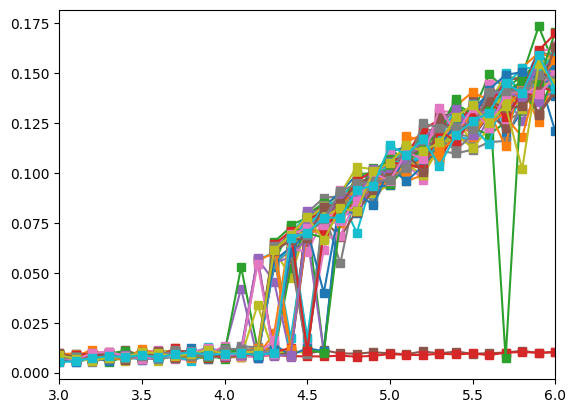

In [180]:
for seed,r_std in r_std_sets.items():
    plt.plot(m_set,r_std,'s-')
    plt.grid()
    plt.xlim(3,6)

(3.0, 6.0)

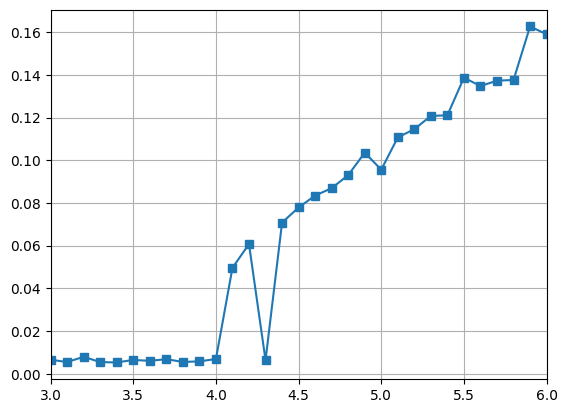

In [162]:
plt.plot(m_set,r_std[-1,:],'s-')
plt.grid()
plt.xlim(3,6)

In [163]:
r_std_sets[seed] = r_std[-1,:]
ALRAM()

Python(37545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(37546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [125]:
avg_dtheta_set.shape

(1500, 50, 1000)

In [108]:
avg_dtheta_set[-1].shape

(50, 2000)

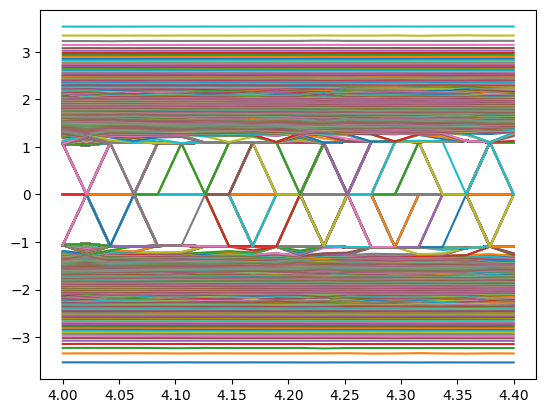

In [116]:
plt.plot(m_set,np.sort(avg_dtheta_set[-1][:,:],axis=1));

In [117]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = []
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean < 0.1, 1e-4, 3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:, i]
    c_check = c_threshold[i]
    CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
        AVG, height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega_sets[i])

    CSO = np.array([(S, O) for S, O in zip(CS, CMP)], dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [118]:
C_0 = []
C_1 = []
C_2 = []

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A) >= 3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A) == 2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A) == 1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A) == 0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

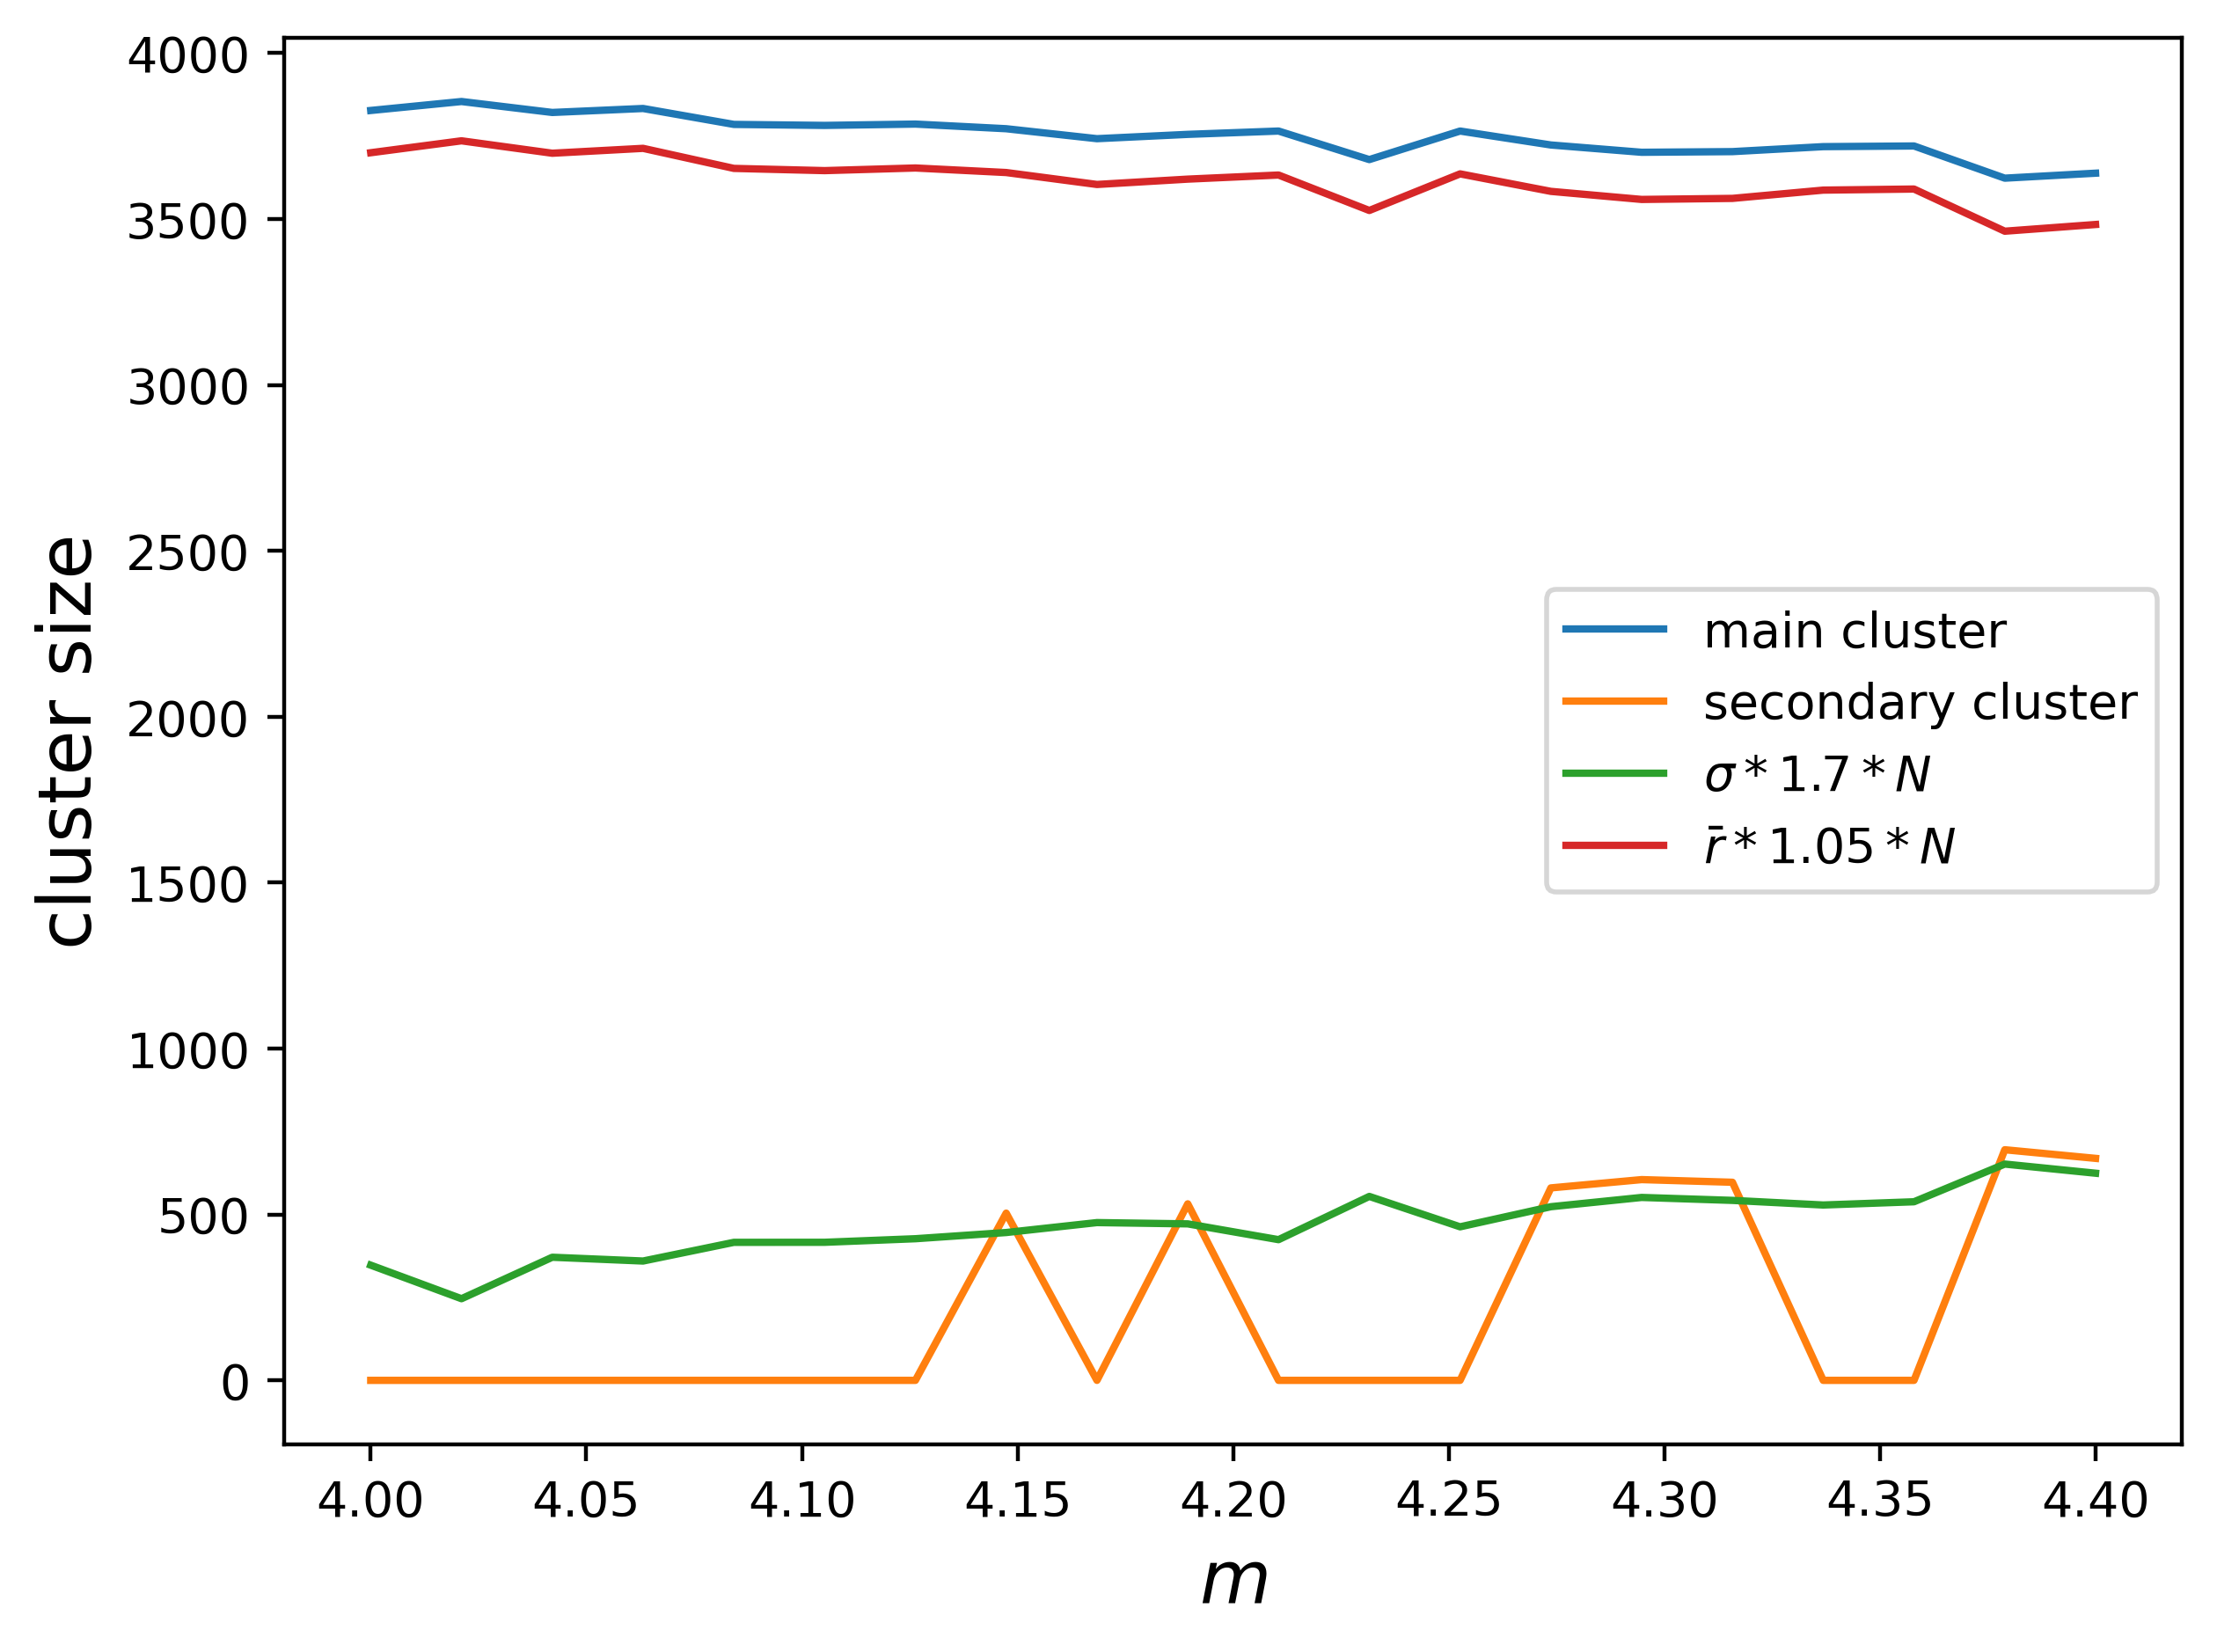

In [119]:
plt.figure(dpi=400)
plt.plot(m_set,np.array(C_0), label='main cluster')
plt.plot(m_set,np.array(C_1) + np.array(C_2), label='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(m_set,r_std[-1]*1.7*N, label=r'$\sigma*1.7*N$')
plt.plot(m_set,r_mean[-1]*1.05*N, label=r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size', fontsize=15)
plt.xlabel('$m$', fontsize=15)
# plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [ ]:
rs_ = rs.T[0].T

In [ ]:
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set, axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [85]:
rs_.shape

(200000, 50)

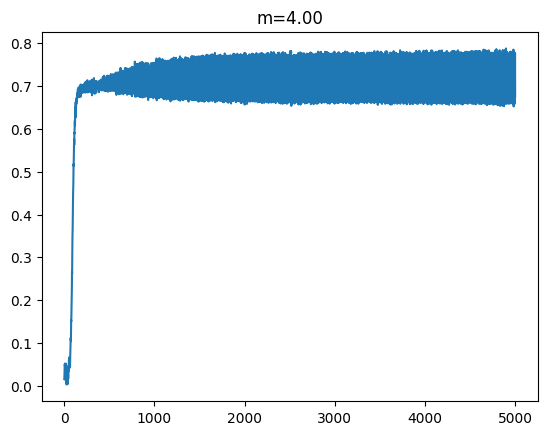

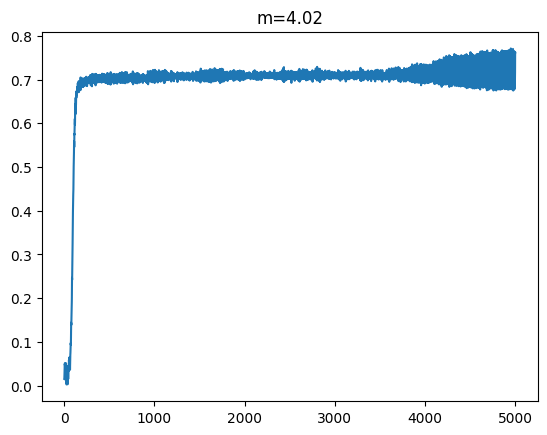

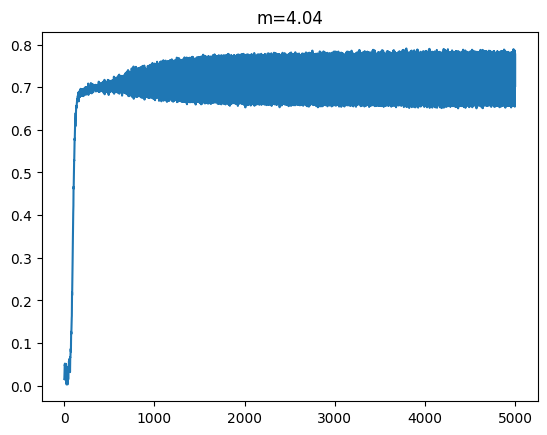

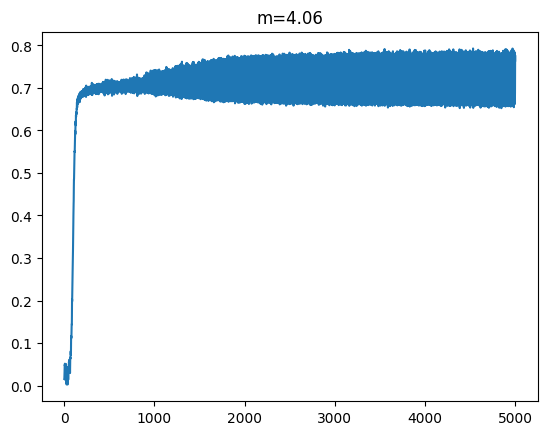

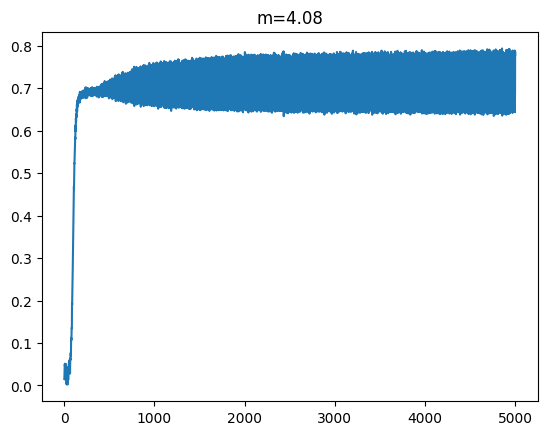

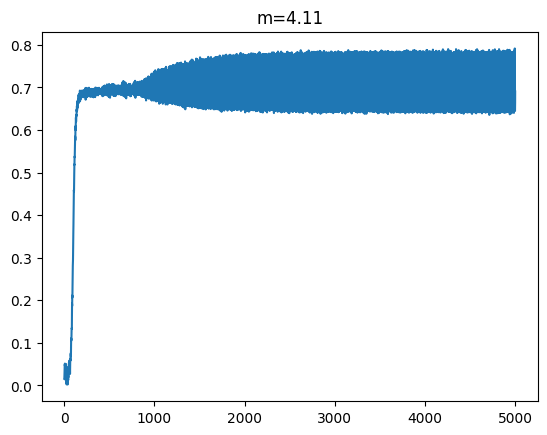

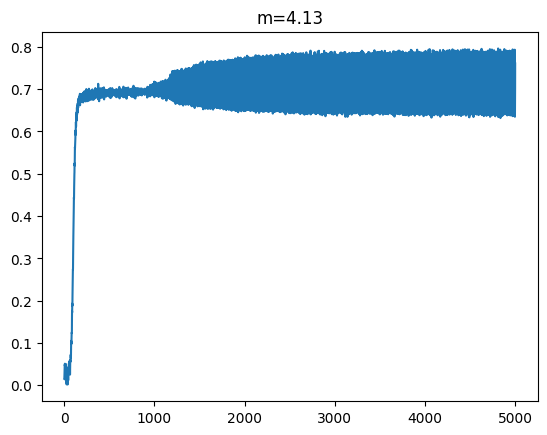

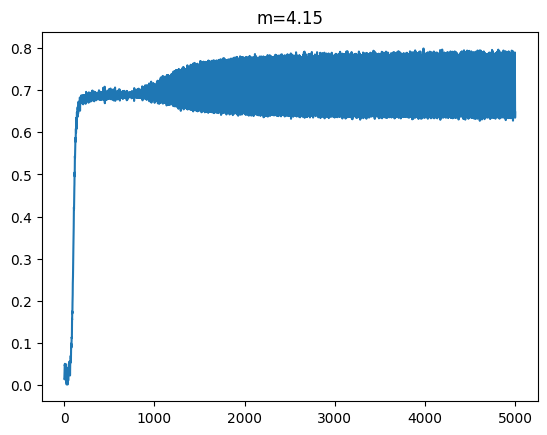

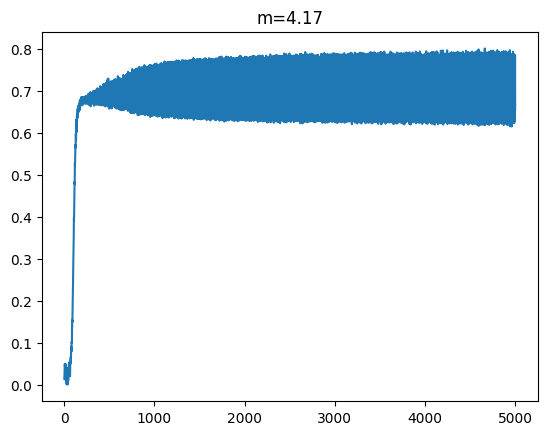

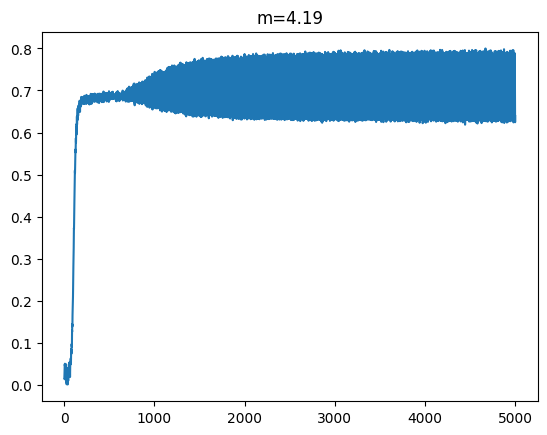

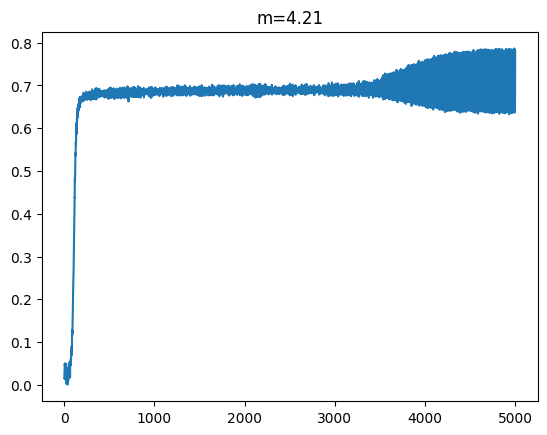

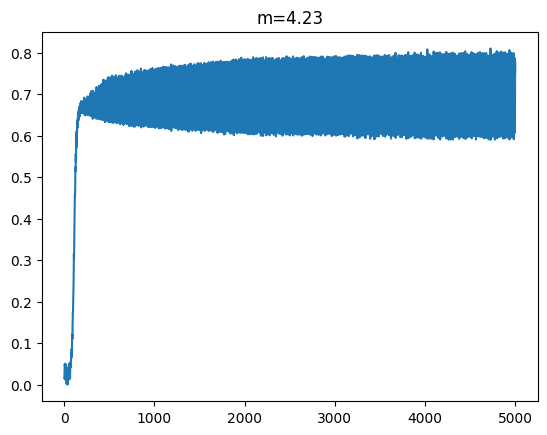

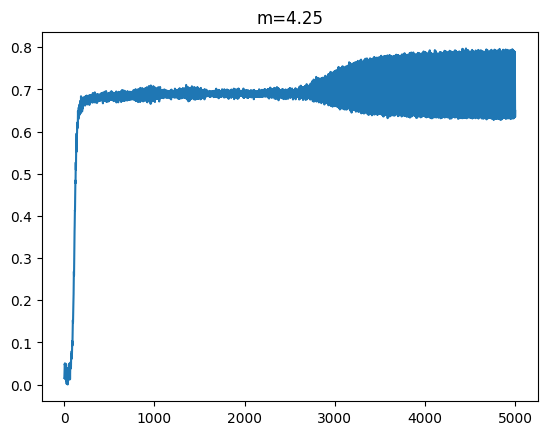

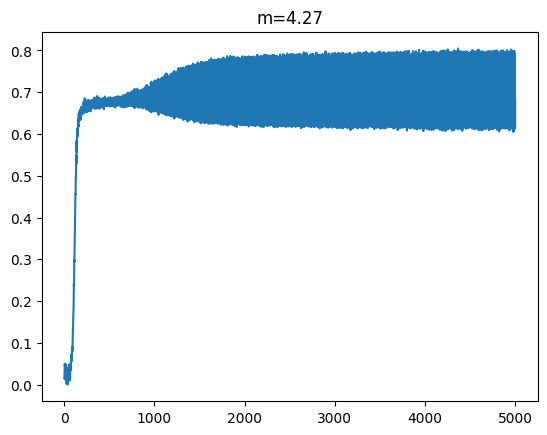

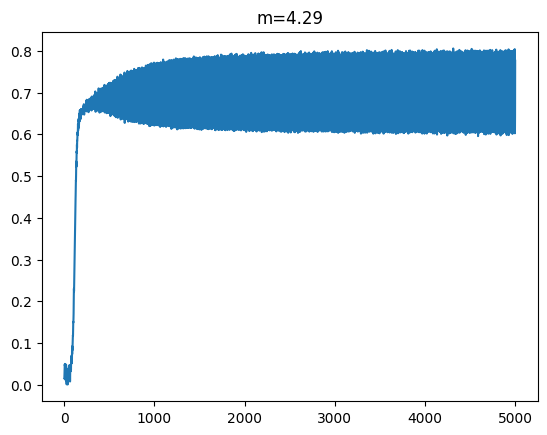

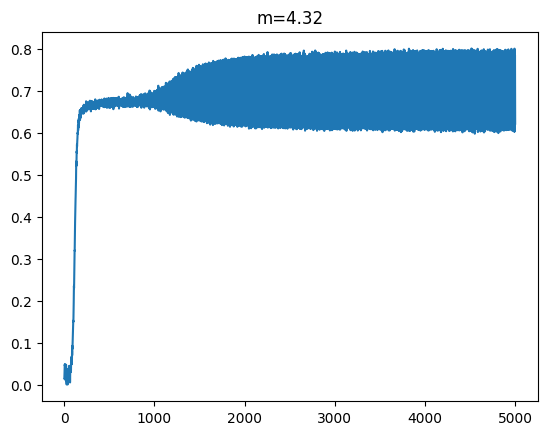

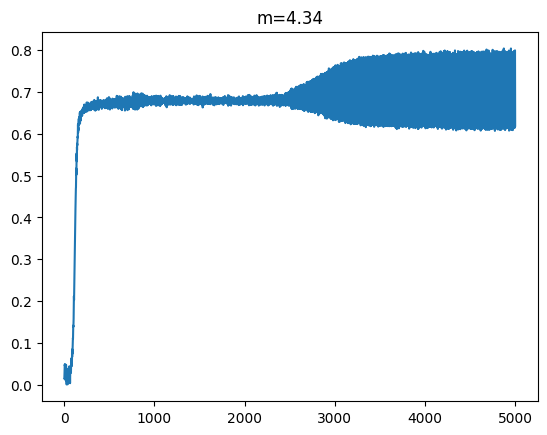

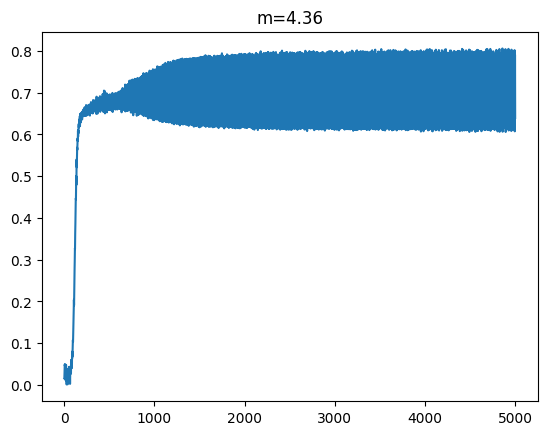

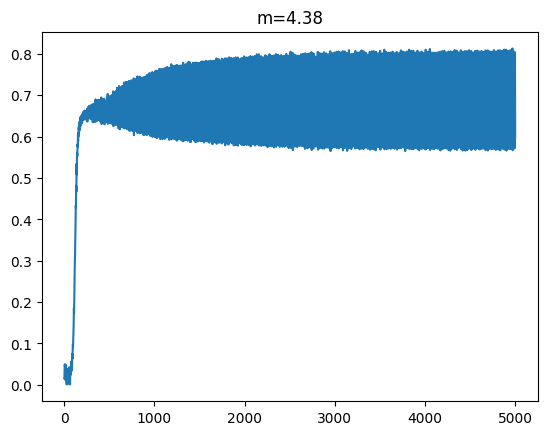

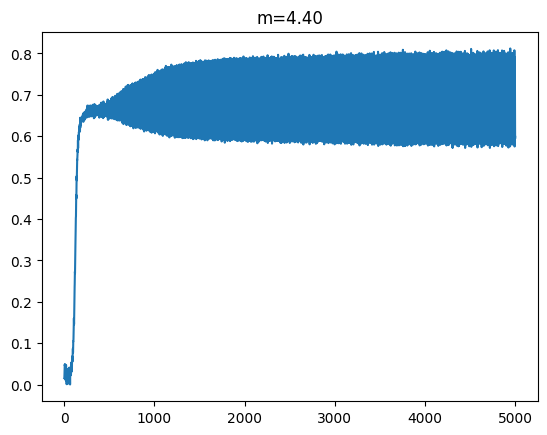

In [120]:
for i,m in enumerate(m_set):
    plt.plot(t,rs_[:,i])
    plt.title(f'm={m[0]:.02f}')
    plt.show()

In [1]:
import TO_sim.Q_simul as QSIM

In [8]:
m = 5
# F_RMd,F_RMu,F_R0d,F_R0u =  OSP.Make_R_function(m)
N = 500
K = 4.1
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=5000)
sol = Qsimul.solve()
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()
# TLO_info = Qsimul.TLO()

In [13]:
# r_clu_info['r_clu_mean_last']
r_clu_info['r_total_mean'][-1]

0.018924410291952548

In [5]:
%timeit Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=5000).solve()

2.52 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
2.52*31/60

1.302